In [1]:
import pyteomics
import altair as alt
import pandas as pd
from pyteomics import mzml, auxiliary
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
import XIC_functions as XIC

# Spectrum Tutorial

This notebook will help you to draw spectrums of your data. 

## Read in data

In this example we will read in a psm file. This will allow us to look at our scans and pick which ones we want to draw XICs for. You do not have to upload an psm file, it is done here simply for convience and example.

Below you will be asked to put the mzml file path and the psm file path.

In [2]:
# MZML file path 
mzml_path = 'Ex_Auto_W17_30umTB_2ngQC_60m_1.mzML'

#psm file path
psm_path = 'psm.tsv'

Here we will read in the data. MsFragger includes the scan number as part of the file name in the 'Spectrum' column. We first have to extract the scan number and make a new column for it. 

In [3]:
#Reading in our data
mzml = pyteomics.mzml.MzML(mzml_path)

psms = pd.read_csv('psm.tsv', sep = '\t')
psms['scanNum'] = psms['Spectrum'].apply(XIC.extractScanNum)

## Drawing a spectra
To make a spectra, you will need a scan number and peptide for an ion, as well as the MZML file. For our example we are using the information from our psm file.

The information came from the 'Peptide' and 'scanNum' columns. 

In [4]:
#input the scan number and its associated peptide that you would like to draw the spectrum for. 
scanNum = '14993'
peptide = 'YSQVLANGLDNK'

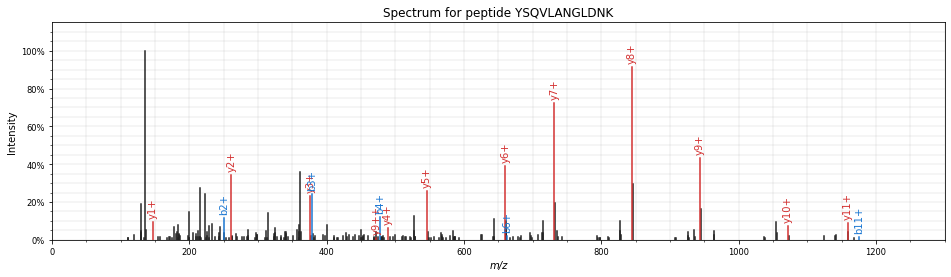

In [5]:
spectrum = XIC.get_spec(scanNum, peptide, mzml)

fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.title('Spectrum for peptide ' + peptide)
plt.show()